In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import torch.nn.functional as F
sns.set()

In [2]:
def plot_mean_std(percentages, accuracies, label, log=False, color="blue"):
    mean = np.mean(accuracies,axis=0)
    std  = np.std(accuracies,axis=0)
   
    plt.plot(percentages,mean, label=label, color=color)
    plt.fill_between(percentages, mean + std, mean - std, facecolor=color, alpha=0.5)
    if log: plt.xscale('log')
    plt.legend()

In [3]:
def treat(arr):
    l = []
    k = []
    for i in range(arr.shape[0]):
        if arr[i]!=0:
            l.append(i)
    return l

__________________________________________________________

### Random


In [4]:
random = np.load('new_random.npy')
l = treat(random[0])
random = np.load('new_random.npy')[:,l]
random_2 = np.load('new_random_2.npy')[:,l]
random_44 = np.load('new_random_44.npy')[:,l]

__________________

### Mean STD


In [5]:
mc_std = np.load('mc_reg_sec_sec.npy')[:,l]

### Gradient length


In [6]:
mc_grad_long = np.load('mc_grad_long.npy')[:,l]
mc_grad_short = np.load('mc_grad_short.npy')[:,l]

In [7]:
mc_grad_dam= np.load('mc_grad_damien.npy')
p = treat(mc_grad_dam[0])
mc_grad_dam = np.load('mc_grad_damien.npy')[:,p]
mc_grad_inv = np.load('mc_grad_inv.npy')[:,p]


### Solo variance reduction to BNN training


In [8]:
mc_var = np.load('mc_reg_var_test.npy')[:,p]

### EER


In [9]:
mc_reg_red = np.load('mc_reg_red.npy')
k = treat(mc_reg_red[0])
mc_reg_red = np.load('mc_reg_red.npy')[:,k]

In [18]:
mc_reg_var = np.load('mc_reg_var.npy')
k = treat(mc_reg_var[0])
mc_reg_var = np.load('mc_reg_var.npy')[:,k]
mc_reg_var_v2 = np.load('mc_reg_var_v2.npy')[:,k]


In [19]:
mc_reg_red_2 = np.load('mc_reg_red_2.npy')[:,k]
mc_reg_red_44 = np.load('mc_reg_red_44.npy')[:,k]
mc_reg_red_v2 = np.load('mc_reg_red_v2.npy')[:,k]
mc_reg_red_v2_44=np.load('mc_reg_red_v2_44.npy')[:,k]

In [33]:
mc_red_t=np.load('mc_red_test.npy')[:,k]
mc_red=np.load('mc_red.npy')[:,k]

__________________________

In [34]:
batch_size_sample = np.ones(261).astype(int)
for i in range(100):
    
    batch_size_sample[i+110]=3
for i in range(60):
    batch_size_sample[i+200]=5

In [35]:
nnn = np.ones(262)
for i in range(261):
    nnn[i+1] = nnn[i] + batch_size_sample[i]

In [36]:
ratio = mc_reg_red/np.mean(random[:,:121],axis=0)

In [37]:
random[:,:].shape

(10, 262)

______________

<Figure size 432x288 with 0 Axes>

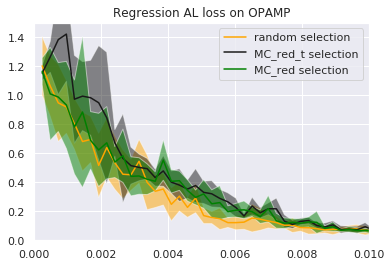

In [38]:
plt.clf()
figsrc, axsrc = plt.subplots()
axsrc.set(xlim=(0, 0.01), ylim=(0,1.5), autoscale_on=False,title='Regression AL loss on OPAMP')
plot_mean_std(nnn[:101]/4146,random[:,:101],'random selection',color='orange')
#plot_mean_std(nnn[:101]/4146,mc_test[:,:101],'random selection',color='k')
#plot_mean_std(nnn[:101]/4146,mc[:,:101],'MC selection',color='blue')
#plot_mean_std(nnn[:101]/4146,mc_std[:,:101],'MC_std selection',color='r')
#plot_mean_std(nnn[:101]/4146,mc_grad_long[:,:101],'MC_grad_l selection',color='b')
#plot_mean_std(nnn[:101]/4146,mc_grad_short[:,:101],'MC_grad_s selection',color='k')
#plot_mean_std(nnn[:101]/4146,mc_reg_red[:,:101],'MC_reg_red selection',color='m')
#plot_mean_std(nnn[:101]/4146,mc_reg_var[:,:101],'MC_reg_red selection',color='blue')
#plot_mean_std(nnn[:101]/4146,mc_grad_dam[:,:101],'MC_grad_dam selection',color='b')
#plot_mean_std(nnn[:101]/4146,mc_var[:,:101],'MC_var selection',color='k')
plot_mean_std(nnn[:101]/4146,mc_red_t[:,:101],'MC_red_t selection',color='k')
plot_mean_std(nnn[:101]/4146,mc_red[:,:101],'MC_red selection',color='green')


#plt.savefig('graph_3%_02.png')

In [34]:
mc_var

array([[1.141338  , 1.5952075 , 0.6556519 , 0.44117898, 0.3810274 ,
        0.26084   , 0.41419896, 0.33143118, 0.392925  , 0.39778915,
        0.4607574 , 0.24073912, 0.22802587, 0.24494494, 0.2307999 ,
        0.27850652, 0.23296292, 0.16273667, 0.15197165, 0.09464311,
        0.13252345, 0.11010043, 0.06138086, 0.08923551, 0.10263176,
        0.1395359 , 0.11647793, 0.13827486, 0.19802316, 0.09645009,
        0.09185635, 0.054042  , 0.09405532, 0.1180402 , 0.12280849,
        0.124314  , 0.04613917, 0.08147363, 0.09635684, 0.08854969,
        0.056919  , 0.05647098, 0.04415856, 0.10767442, 0.06389247,
        0.07573178, 0.04096175, 0.05454833, 0.03213659, 0.02539846,
        0.02887307, 0.03935188, 0.02211187, 0.04449044, 0.02976418,
        0.04962622, 0.0211943 , 0.03220543, 0.03606449, 0.03167095,
        0.01494228, 0.01748006, 0.03288921, 0.01918275, 0.03043704,
        0.01993231, 0.01375504, 0.02296542, 0.03257629, 0.03698184,
        0.01585478, 0.02013666, 0.02301815, 0.02

<Figure size 432x288 with 0 Axes>

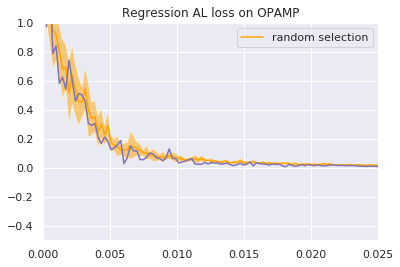

In [30]:
plt.clf()
figsrc, axsrc = plt.subplots()
axsrc.set(xlim=(0, 0.025), ylim=(-0.5,1), autoscale_on=False,title='Regression AL loss on OPAMP')
plot_mean_std(nnn[:121]/4146,random[:,:121],'random selection',color='orange')
#plot_mean_std(nnn[:121]/4146,mc_reg_red[:,:121],'MC_reg_red selection',color='m')
#plot_mean_std(nnn[:121]/4146,mc_reg_var[:,:121],'MC_reg_var selection',color='blue')
#plot_mean_std(nnn[:121]/4146,mc_reg_var_v2[:,:121],'MC_var_red selection',color='blue')
#plot_mean_std(nnn[:121]/4146,mc_reg_red_v2[:,:121],'MC_error_red selection',color='r')
#plot_mean_std(nnn[:101]/4146,mc_std[:,:101],'MC_std selection',color='k')
#plot_mean_std(nnn[:121]/4146,mc_grad_inv[:,:121],'MC_grad_inv selection',color='k')
plt.plot(nnn[:121]/4146,mc_var[0,:121],color='m')




In [26]:
mc_var

array([[0.97381145, 1.3178688 , 0.78785425, 0.84161013, 0.5819293 ,
        0.62578064, 0.5423832 , 0.74318963, 0.59815186, 0.46010226,
        0.5130468 , 0.5025507 , 0.45940366, 0.3056007 , 0.29219872,
        0.30666807, 0.21127692, 0.16737105, 0.21226223, 0.18254432,
        0.12476771, 0.1373126 , 0.15918846, 0.1890094 , 0.02846442,
        0.06902545, 0.15031739, 0.11694819, 0.11713498, 0.05603859,
        0.05656916, 0.07335194, 0.10194519, 0.09605107, 0.06979448,
        0.06556723, 0.04897314, 0.06680365, 0.1305087 , 0.06605686,
        0.06329486, 0.03241826, 0.04147746, 0.04528784, 0.05576615,
        0.06304759, 0.02658169, 0.02537456, 0.02364121, 0.03685442,
        0.0269884 , 0.03526598, 0.03368252, 0.03254953, 0.02629635,
        0.02756287, 0.03280822, 0.02038901, 0.01540303, 0.02203109,
        0.03129732, 0.01989083, 0.02440706, 0.04145605, 0.01260415,
        0.03461827, 0.02868787, 0.02700492, 0.02501936, 0.01837534,
        0.02720795, 0.02234907, 0.02536011, 0.01

<Figure size 432x288 with 0 Axes>

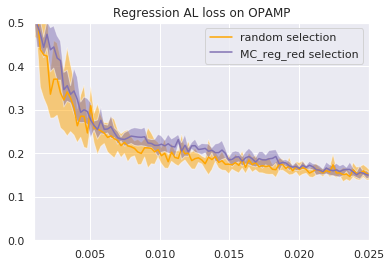

In [34]:
plt.clf()
figsrc, axsrc = plt.subplots()
axsrc.set(xlim=(0.001, 0.025), ylim=(0,0.5), autoscale_on=False,title='Regression AL loss on OPAMP')
plot_mean_std(nnn[:121]/4146,random_2[:,:121],'random selection',color='orange')
plot_mean_std(nnn[:121]/4146,mc_reg_red_2[:,:121],'MC_reg_red selection',color='m')



<Figure size 432x288 with 0 Axes>

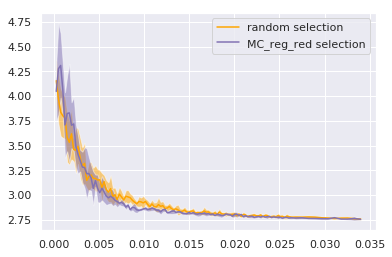

In [70]:
plt.clf()
figsrc, axsrc = plt.subplots()
#axsrc.set(xlim=(0, 0.025), ylim=(2.5,3.5), autoscale_on=False,title='Regression AL loss on OPAMP')
plot_mean_std(nnn[:121]/4146,random_44[:,:121],'random selection',color='orange')
plot_mean_std(nnn[:121]/4146,mc_reg_red_44[:,:121],'MC_reg_red selection',color='m')
#plot_mean_std(nnn[:121]/4146,mc_reg_red_v2_44[:,:121],'MC_reg_red selection',color='r')



In [36]:
ratio_44 = mc_reg_red_44/np.mean(random_44[:,:121],axis=0)

<Figure size 432x288 with 0 Axes>

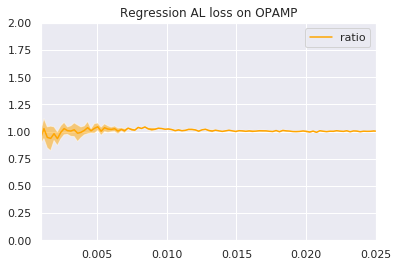

In [37]:
plt.clf()
figsrc, axsrc = plt.subplots()
axsrc.set(xlim=(0.001, 0.025), ylim=(0,2), autoscale_on=False,title='Regression AL loss on OPAMP')
plot_mean_std(nnn[:121]/4146,1/ratio_44[:,:121],'ratio',color='orange')

<Figure size 432x288 with 0 Axes>

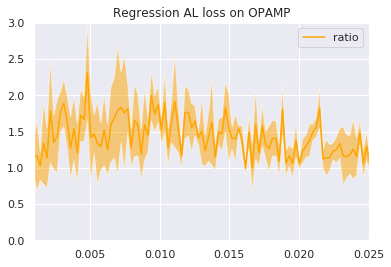

In [66]:
plt.clf()
figsrc, axsrc = plt.subplots()
axsrc.set(xlim=(0.001, 0.025), ylim=(0,3), autoscale_on=False,title='Regression AL loss on OPAMP')
plot_mean_std(nnn[:121]/4146,1/ratio[:,:121],'ratio',color='orange')

<Figure size 432x288 with 0 Axes>

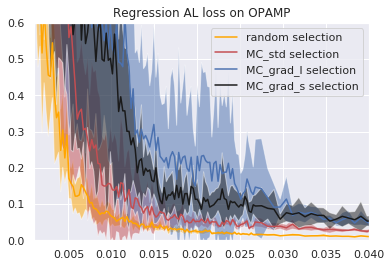

In [24]:
plt.clf()
figsrc, axsrc = plt.subplots()
axsrc.set(xlim=(0.001, 0.04), ylim=(0,0.6), autoscale_on=False,title='Regression AL loss on OPAMP')
plot_mean_std(nnn/4146,random,'random selection',color='orange')
plot_mean_std(nnn/4146,mc_std,'MC_std selection',color='r')
plot_mean_std(nnn/4146,mc_grad_long,'MC_grad_l selection',color='b')
plot_mean_std(nnn/4146,mc_grad_short,'MC_grad_s selection',color='k')
#plot_mean_std(nnn/4146,mc_b,'MC_b selection',color='r')
#plt.savefig('graph_3%_02.png')

In [175]:
mc[:,157:162]

array([[0.55618787, 0.54366624, 0.5611879 , 0.5886178 , 0.5986436 ],
       [0.5979228 , 0.5706223 , 0.5606887 , 0.5584361 , 0.6303703 ],
       [0.5729925 , 0.55134207, 0.5698384 , 0.5483015 , 0.6477804 ],
       [0.5603111 , 0.5159641 , 0.5762782 , 0.5619341 , 0.6785578 ],
       [0.56326926, 0.5522552 , 0.5495196 , 0.5804543 , 0.62106776]],
      dtype=float32)

<Figure size 432x288 with 0 Axes>

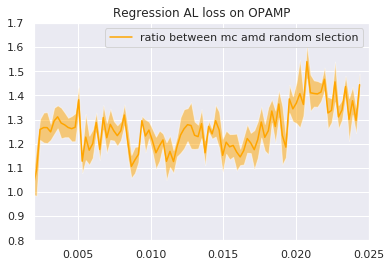

In [176]:
plt.clf()
figsrc, axsrc = plt.subplots()
axsrc.set(xlim=(0.002, 0.025), ylim=(0.8,1.7), autoscale_on=False,title='Regression AL loss on OPAMP')
plot_mean_std(nnn[:101]/4146,1/ratio[:,:101],'ratio between mc amd random slection',color='orange')

plt.savefig('graph_3%_ratio.png')

<Figure size 432x288 with 0 Axes>

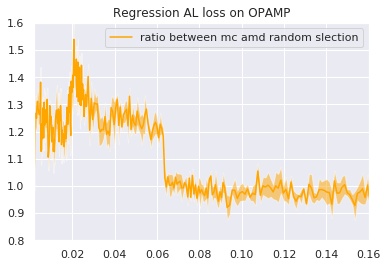

In [177]:
plt.clf()
figsrc, axsrc = plt.subplots()
axsrc.set(xlim=(0.002, 0.16), ylim=(0.8,1.6), autoscale_on=False,title='Regression AL loss on OPAMP')
plot_mean_std(nnn/4146,1/ratio,'ratio between mc amd random slection',color='orange')

plt.clf()
figsrc, axsrc = plt.subplots()
axsrc.set(xlim=(0, 0.018), ylim=(1, 6), autoscale_on=False,title='Regression AL loss on OPAMP')
plot_mean_std(nnn[:101]/5620,random[:,:101],'random selection',color='orange')
#plot_mean_std(nnn/3420,vogn,'Vogn_ selection',color='r')
plot_mean_std(nnn[:101]/5620,mc,'MC selection',color='blue')

plt.savefig('graph_vogn.png')

<Figure size 432x288 with 0 Axes>

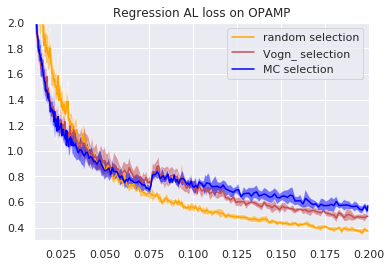

In [34]:
plt.clf()
figsrc, axsrc = plt.subplots()
axsrc.set(xlim=(0.01, 0.2), ylim=(0.3, 2), autoscale_on=False,title='Regression AL loss on OPAMP')
plot_mean_std(nnn/3420,random,'random selection',color='orange')
plot_mean_std(nnn/3420,vogn,'Vogn_ selection',color='r')
plot_mean_std(nnn/3420,mc,'MC selection',color='blue')

plt.savefig('graph_full.png')

In [ ]:
mse = np.load(...)
y    = np.load("regression/data/{}/testy.npy".format(dataset))
ybar = ytest.mean(axis=0, keepdims=True)
denominator = np.power((ytest - y.mean()),2).mean()
r2 = 1 - mse / denominator